In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 

from torch import nn
from classes import *

In [4]:
with open('base dados/data10000_test.dat', 'rb') as arq:

    branch = np.load(arq)
    trunk = np.load(arq)
    target = np.load(arq)

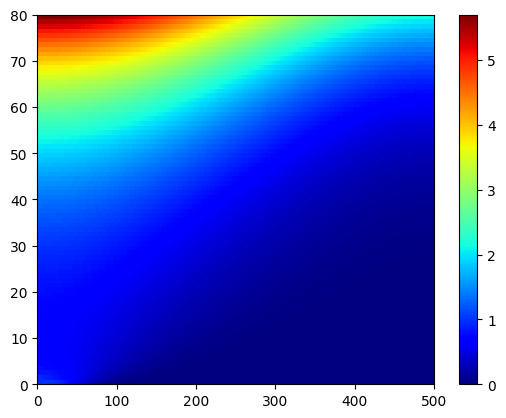

In [12]:
target = target.reshape(10000, 80, 500)
plt.pcolormesh(target[2], cmap='jet')
plt.colorbar()
plt.show()

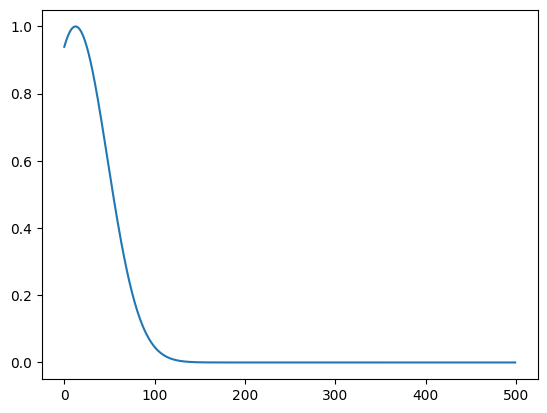

In [18]:
plt.plot(target[3, 0])

In [11]:
a = np.random.uniform(size = (100, 1), low = 0.0164, high = 0.8877)
b = np.random.uniform(size = (100, 1), low = 0.0027, high = 0.0877)

np.hstack((a, b))

array([[0.70038261, 0.02238693],
       [0.41055603, 0.04041045],
       [0.24719057, 0.05443064],
       [0.51022042, 0.04095543],
       [0.79278037, 0.08387908],
       [0.25748158, 0.02209324],
       [0.16619748, 0.03335807],
       [0.05936342, 0.03417123],
       [0.12641578, 0.06128684],
       [0.65618219, 0.06379809],
       [0.42938139, 0.02976785],
       [0.38648651, 0.00657079],
       [0.27855537, 0.05190005],
       [0.84092103, 0.03714753],
       [0.61235342, 0.04509498],
       [0.72360005, 0.00922318],
       [0.0925833 , 0.04337775],
       [0.75217053, 0.04094821],
       [0.46207523, 0.05181331],
       [0.50151354, 0.04695753],
       [0.56965181, 0.05079539],
       [0.1714624 , 0.06072561],
       [0.53836796, 0.06454641],
       [0.39651937, 0.0473162 ],
       [0.54939824, 0.0085397 ],
       [0.64722391, 0.05569485],
       [0.0608823 , 0.01335579],
       [0.50547184, 0.0301306 ],
       [0.02737597, 0.08389842],
       [0.57855553, 0.08486667],
       [0.

In [7]:
a = np.random.uniform(size = (100, 80))
b = np.random.uniform(size = (100, 4))

a.shape, b.shape

((100, 80), (100, 4))

In [8]:
np.hstack((a, b)).shape

(100, 84)

In [2]:
quantidade_camadas = 5
quantidade_neuronios = 200
amostras = 10_000

In [3]:
model = DeepONet(
    [100] + (quantidade_camadas + 1) * [quantidade_neuronios],
    [2] + (quantidade_camadas + 1) * [quantidade_neuronios],
    torch.relu
)

In [7]:
with open('base dados/data20000_teste.dat', 'rb') as arq:

    branch = np.load(arq)
    #trunk = np.load(arq)
    #target = np.load(arq)

EOFError: No data left in file

In [4]:
module = Module_DeepONet(model, nn.MSELoss())
module.load_database('base dados/data20000_teste.dat')

EOFError: No data left in file

In [ ]:

model.load(f'model/model{amostras}-1000.pt')
model = model.cpu()

module = Module_DeepONet(model, nn.MSELoss())
module.load_database('base dados/data60000.dat')
module.evaluate()
#module.trainning(10_000, 'model', 250, batch_size = 64, epochs = 1000, learning_rate = 1e-3, percent = 0.8)

np.float64(34.86154535162279)

0.0003633450503693894 0.013336569055914878


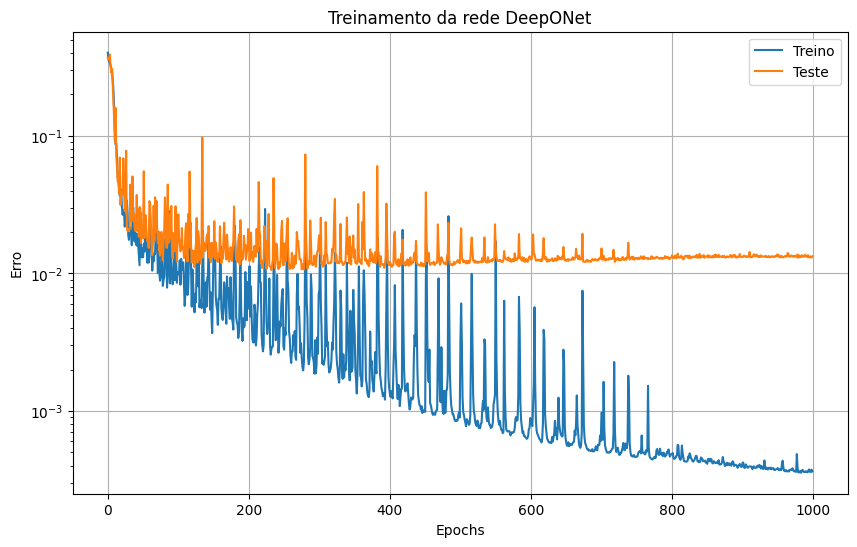

In [28]:
with open(f'model/trainning{amostras}-1000.dat', 'rb') as arq: loss_history = np.load(arq)

print(loss_history[0][-1], loss_history[1][-1])

fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(loss_history[0], label = 'Treino')
plt.plot(loss_history[1], label = 'Teste')

plt.title('Treinamento da rede DeepONet')
plt.xlabel('Epochs')
plt.ylabel('Erro')

plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

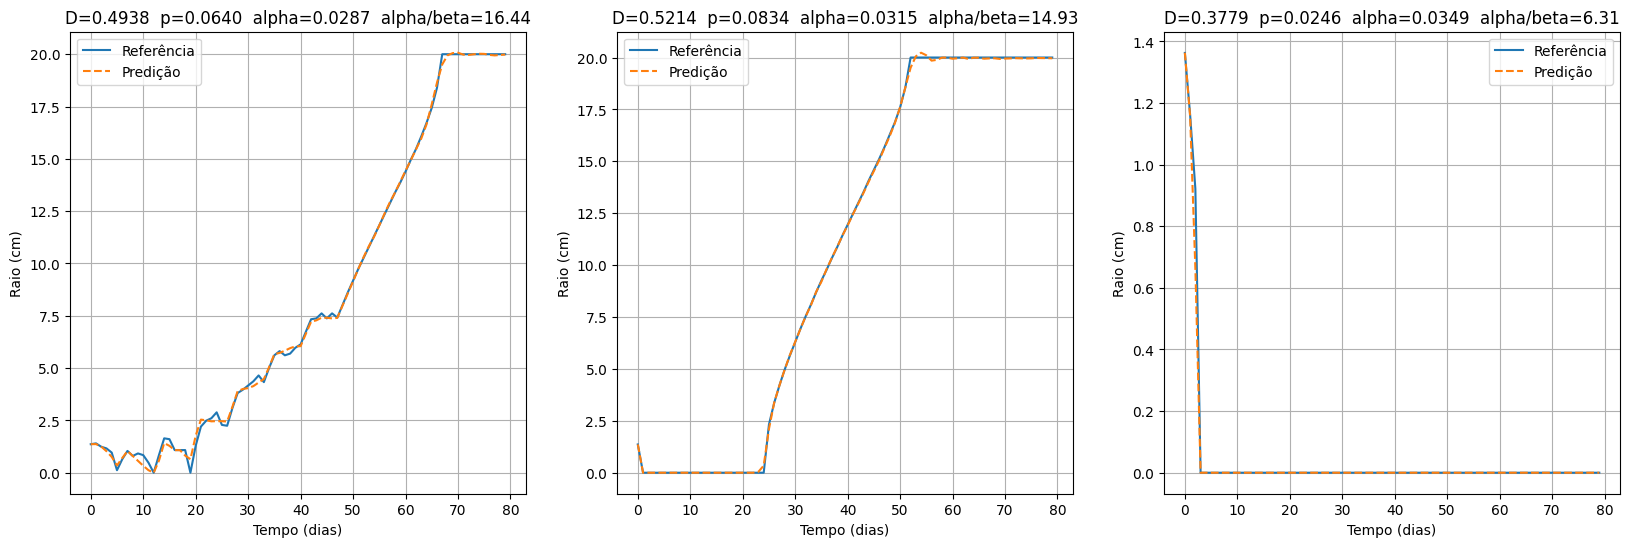

In [97]:
pred, ref = module.get_results()
fig, ax = plt.subplots(ncols=3, figsize = (20, 6))

k = 10
for i in range(3):

    ax[i].plot(ref[k], label = 'Referência')
    ax[i].plot(pred[k], label = 'Predição', linestyle = 'dashed')

    ax[i].set_title(f'D={module.database[0][k, -4]:.4f}  p={module.database[0][k, -3]:.4f}  alpha={module.database[0][k, -2]:.4f}  alpha/beta={module.database[0][k, -1]:.2f}')
    ax[i].set_xlabel('Tempo (dias)')
    ax[i].set_ylabel('Raio (cm)')

    ax[i].legend()
    ax[i].grid()

    k += 4



Erro: 6.1847155168652534


C:\Users\rique\AppData\Local\Temp\ipykernel_6628\1462150229.py:19: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].plot(abs(ref[i] - pred[i]))


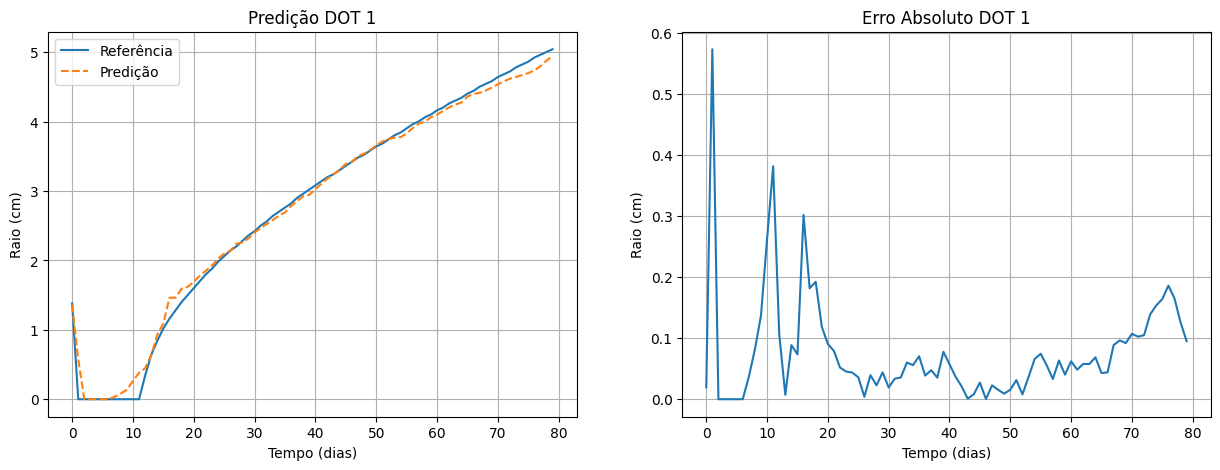

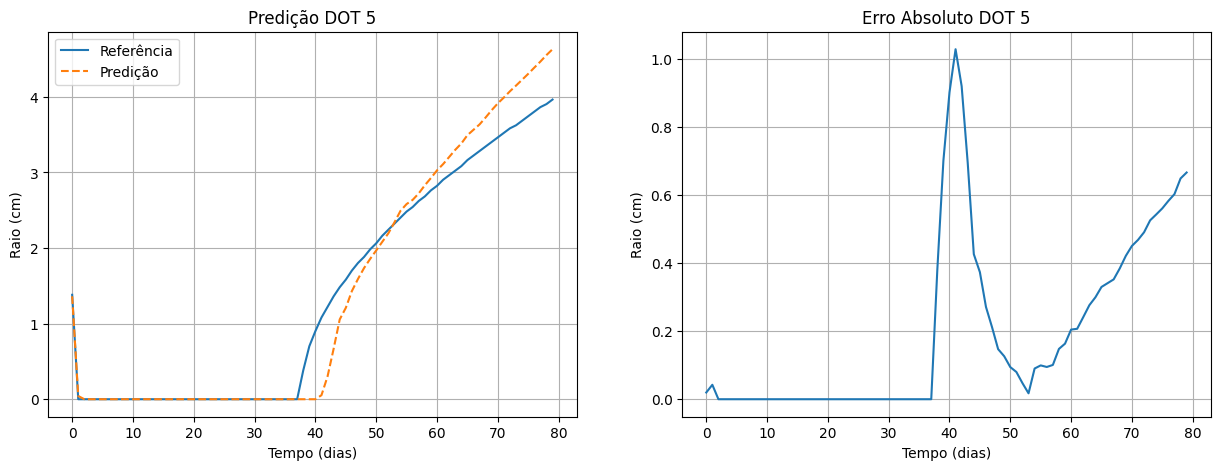

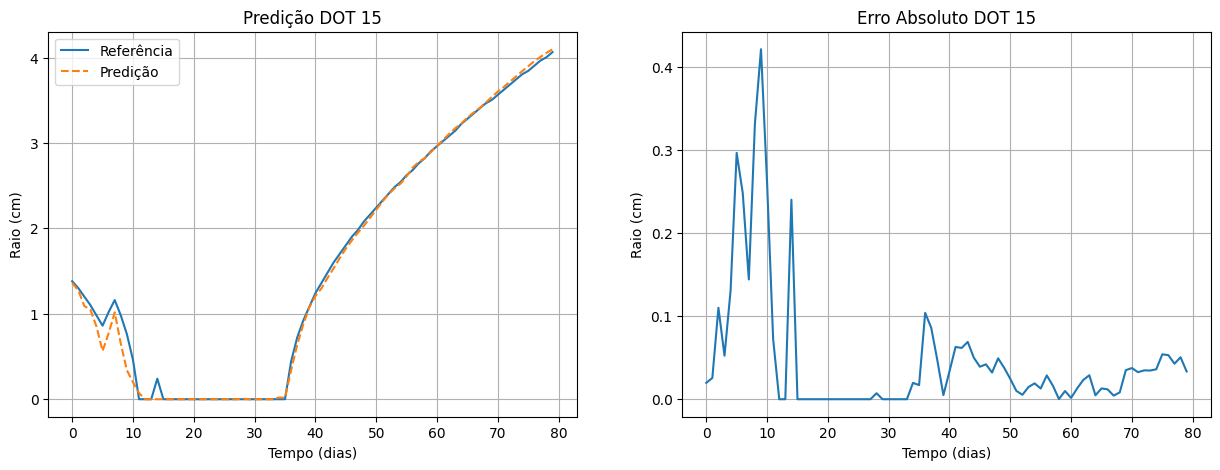

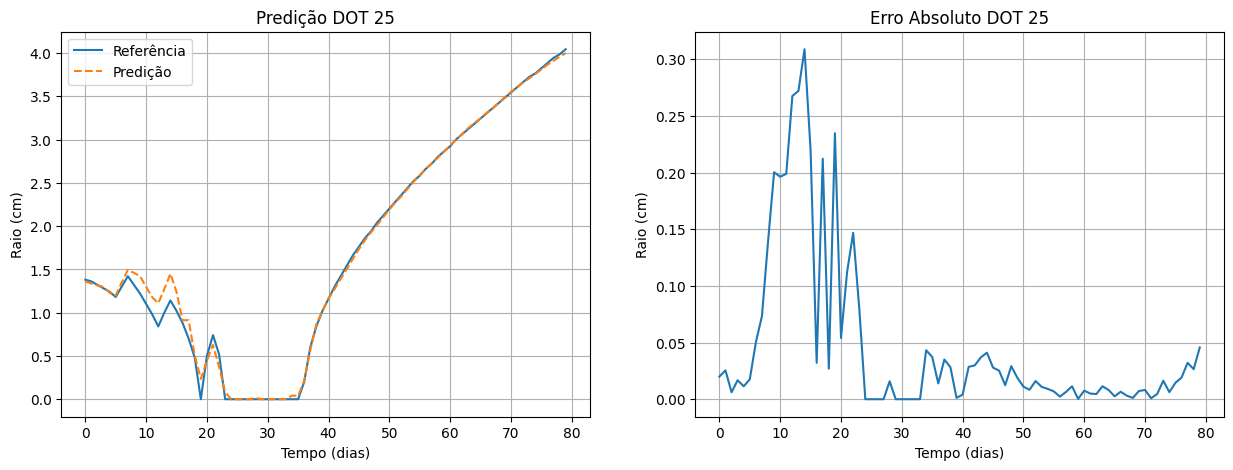

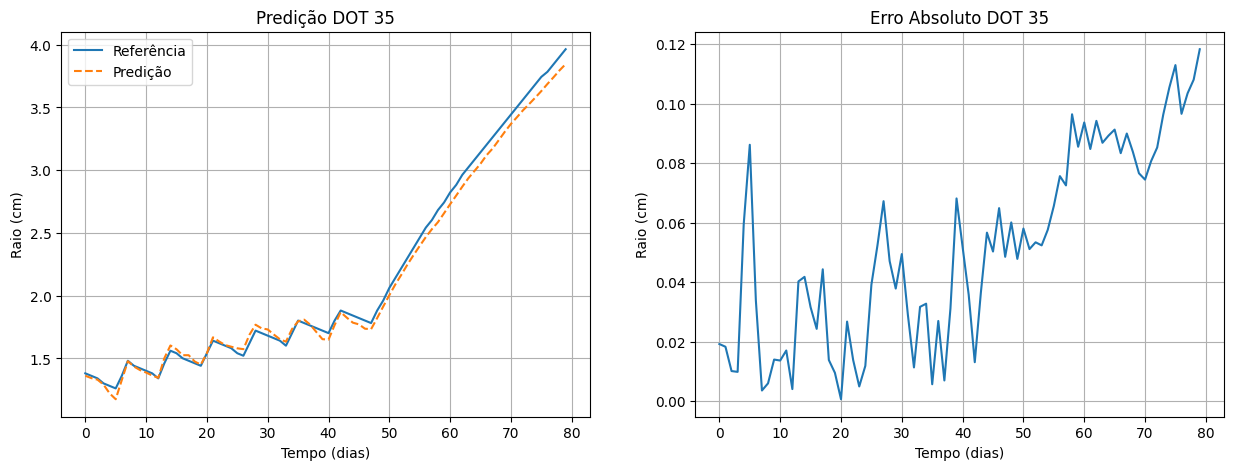

In [98]:
module.load_database('base dados/validacao.dat')
print(f'Erro: {module.evaluate()}')
pred, ref = module.get_results()

dot = [1, 5, 15, 25, 35]
for i in range(5):

    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

    ax[0].plot(ref[i], label='Referência')
    ax[0].plot(pred[i], label='Predição', linestyle = 'dashed')
    ax[0].set_title(f'Predição DOT {dot[i]}')
    ax[0].grid()
    ax[0].legend()

    ax[0].set_xlabel('Tempo (dias)')
    ax[0].set_ylabel('Raio (cm)')

    ax[1].plot(abs(ref[i] - pred[i]))
    ax[1].set_title(f'Erro Absoluto DOT {dot[i]}')
    ax[1].grid()

    ax[1].set_xlabel('Tempo (dias)')
    ax[1].set_ylabel('Raio (cm)')

    plt.show()

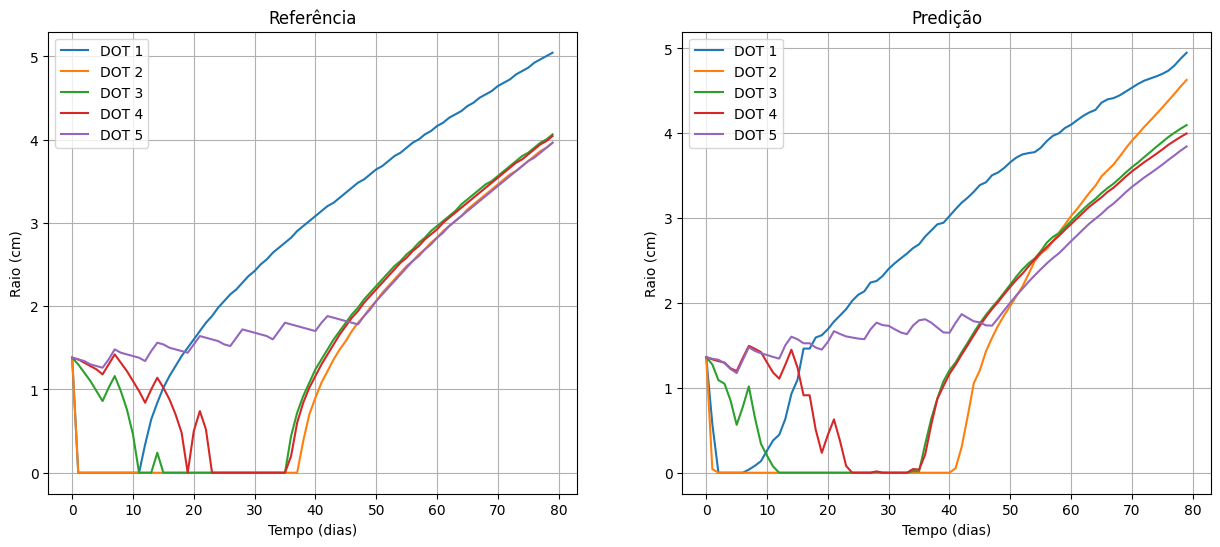

In [99]:
fig, ax = plt.subplots(ncols=2, figsize = (15, 6))

for i in range(5): ax[0].plot(ref[i], label = f'DOT {i+1}')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Referência')
ax[0].set_xlabel('Tempo (dias)')
ax[0].set_ylabel('Raio (cm)')


for i in range(5): ax[1].plot(pred[i], label = f'DOT {i+1}')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Predição')
ax[1].set_xlabel('Tempo (dias)')
ax[1].set_ylabel('Raio (cm)')

plt.show()